# GRADIENT DESCENT FOR LINEAR REGRESSION

This notebook contains my implementation of linear regression with gradient descent in Python 3. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## PART I - FROM FORMULAS TO CODE

### Linear regression function.

Here's the standard univariate linear regression function:

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 $$

Where $\theta_0$ represents the intercept and $\theta_1$ denotes the slope of the line we're trying to fit to the data. These are the model's parameters (often also called weights).

To simplify computation a little, let us multiply $\theta_0$ by a constant, $x_0$, where $ x_0=1 $. Our equation then becomes:

$$ h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 $$

Since $x_0$ is always equal to 1 our original linear regression function remains unchanged. But, we can now represent it as the sum of all $\theta_i$ multiplied by $x_i$:



$$ h_\theta(x) = \sum \theta_i x_i $$


This is the equation we'll use to generate predictions.

In [2]:
# FAKE SOME DUMMY DATA

dummy_data = np.array([[1, 1],
                       [1, 2], 
                       [1, 3],
                       [1, 4]])

dummy_y = np.array([1,
                    2,
                    3,
                    4])

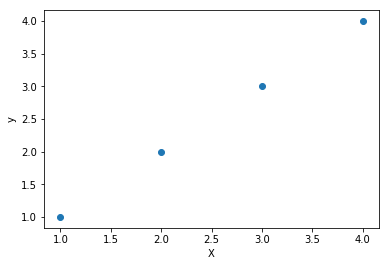

In [3]:
# SCATTER PLOT

plt.scatter(dummy_data[:,1], dummy_y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
dummy_weights = np.ones(len(dummy_data[0])) # Initialize weights
print("Weights: ", dummy_weights)

Weights:  [1. 1.]


In [5]:
dummy_y_hat = np.sum(dummy_weights * dummy_data, axis=1) # Generate predictions 
print("Predicted outputs: ", dummy_y_hat)

Predicted outputs:  [2. 3. 4. 5.]


### Loss function.

To evaluate the fit of our regression function, we'll use mean squared error (MSE):

$$ J(\theta_i) = \frac{1}{m} \sum (h_\theta(x) - y)^2 $$

Where $m$ is the number of training examples in our dataset, and $y$ represents actual outputs. Hence, we are simply computing the difference (also called the error) between our predicted outputs and the actual outputs. Then squaring the errors, adding them up, and calculating their average.

Here, we'll use MSE with a slight modification:



$$ J(\theta_i) = \frac{1}{2m} \sum (h_\theta(x) - y)^2 $$


In [6]:
# LOSS

dummy_sq_errors = (dummy_y_hat - dummy_y) ** 2
dummy_loss = 1/(2*len(dummy_data)) * sum(dummy_sq_errors)
print("Mean squared error: ", dummy_loss)

Mean squared error:  0.5


### Gradient descent.

Next we'll need a way to update the models parameters $\theta_i$ during each iteration such that we minimize the loss. To do this we'll use gradient descent:

$$ \theta_i := \theta_i - \eta \frac{\partial}{\partial \theta_i} J (\theta_i) $$

Where $:=$ denotes assignment (e.g. $a := b$ means replace a with b), $\eta$ represents learning rate, and $\frac{\partial}{\partial \theta_i} J (\theta_i)$ is the partial derivative of our loss function.

### Gradient descent derivation.

If we substitute $ J(\theta_i) $ with its right-hand side, we can rewrite its partial derivative as:

$$ \frac{\partial}{\partial \theta_i} J (\theta_i) = \frac{\partial}{\partial \theta_i} \left[ \frac{1}{2m} \sum (h_\theta(x) - y)^2 \right] $$

The next steps are as follows:

$$ = \frac{1}{2m} \sum \frac{\partial}{\partial \theta_i} (h_\theta(x) - y)^2 $$

$$ = \frac{1}{2m} \sum 2(h_\theta(x) - y) \frac{\partial}{\partial \theta_i} (h_\theta(x) - y) $$

$$ = \frac{1}{2m} 2 \sum (h_\theta(x) - y) \left[ \frac{\partial}{\partial \theta_i} h_\theta(x) - \frac{\partial}{\partial \theta_i} y \right] $$

$$ = \frac{1}{m} \sum (h_\theta(x) - y) \left[ \frac{\partial}{\partial \theta_i} h_\theta(x) - 0 \right] $$

Now let's solve $\frac{\partial}{\partial \theta_i} h_\theta(x)$ for $\theta_1$ by substituting $h_\theta(x)$ with its right-hand side:

$$ \frac{\partial}{\partial \theta_1} h_\theta(x) = \frac{\partial}{\partial \theta_1} (\theta_0 + \theta_1 x_1) $$

$$ = \frac{\partial}{\partial \theta_1} \theta_0 + \frac{\partial}{\partial \theta_1} \theta_1x_1 $$

$$ = 0 + \frac{\partial \theta_1}{\partial \theta_1} x_1 $$

$$ = 1 \times x_1 $$

The solution for each of our parameters $\theta_i$ is the same as for $\theta_1$. Hence:

$$ \frac{\partial}{\partial \theta_i} J (\theta_i) = \frac{1}{m} \sum (h_\theta(x) - y) x_i $$


And putting all the pieces back into our gradient descent gives us the final formula we'll be implementing:

    
$$ \theta_i := \theta_i - \eta \frac{1}{m} \sum (h_\theta(x) - y) x_i $$


In [7]:
# GRADIENT DESCENT

dummy_eta = 0.1 # learning rate

dummy_error = dummy_y_hat - dummy_y # calculate error
dummy_weights = dummy_weights - dummy_eta * 1/len(dummy_data) * np.dot(dummy_error, dummy_data)
print("Updated weights: ", dummy_weights)

Updated weights:  [0.9  0.75]


A few references for the derivation process:  
https://math.stackexchange.com/questions/70728/partial-derivative-in-gradient-descent-for-two-variables  
https://www.mathsisfun.com/calculus/derivatives-rules.html  
https://study.com/academy/lesson/how-to-take-the-derivative-of-x-2-steps-tutorial.html  
https://mccormickml.com/2014/03/04/gradient-descent-derivation/

### A note on multivariate regression.

For multivariate regression, the function takes the form of:

$$ h_\theta(x) = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... +\theta_nx_n $$

Where $x_0$ is a constant always equal to 1. 

$$ x_0 = 1 $$

Note this formula can also be represented as:

$$ h_\theta(x) = \sum \theta_i x_i $$

Hence, our formulas for univariate and multivarite regression are identical.

We could also represent the equation as theta transpose x, as we are transposing the $\theta$ vector and multiplying it by the $x$ vector.

$$ h_\theta(x) = \theta^\intercal x $$

## PART II - THE FUNCTION

Next, we define the linear regression function and test it on dummy data.

In [8]:
def linear_regression(data, y, eta, epochs):
    
    epoch_count = 0
    loss = []
    
    weights = np.zeros(len(data[0])) # Initialize weights with zeros
    
    while epochs > epoch_count: 
        
        # GENERATE PREDICTIONS
        y_hat = np.sum(weights * data, axis=1)
        
        # UPDATE WEIGHTS
        errors = y_hat - y # Calculate errors
        weights = weights - eta * 1/len(data) * np.dot(errors, data)
        
        # COMPUTE LOSS
        squared_errors = (y_hat - y) ** 2
        loss.append(1/(2*len(data)) * sum(squared_errors))
        
        # Update epoch count
        epoch_count += 1
    
    return weights, loss, y_hat

### Test on fake data.

In [9]:
# FAKE DATA

fake_data = np.array([[1, 1.0],
                      [1, 2.5], 
                      [1, 4.0],
                      [1, 5.5],
                      [1, 7.0]])

fake_y = np.array([1, 2, 3, 4, 5])

# SPECIFY PARAMETERS
eta = 0.01
epochs = 20

# TRAIN THE MODEL
model = linear_regression(fake_data, fake_y, eta, epochs)
print("Weights: ", model[0])
print("Loss: ", model[1])
print("Predictions: ", model[2])

Weights:  [0.14588575 0.69752062]
Loss:  [5.5, 3.409075, 2.113639710625, 1.3110486218651403, 0.8137982699668197, 0.505721232086613, 0.31484619703812355, 0.19658347252901495, 0.12330759739855124, 0.07790326837712769, 0.04976673099701093, 0.032328448757530805, 0.02151827740741306, 0.014814566521961947, 0.010655032151265576, 0.008071764063549605, 0.006465095160680757, 0.005463502694522646, 0.004836810325726523, 0.004442412620458996]
Predictions:  [0.84118765 1.88520224 2.92921684 3.97323144 5.01724604]


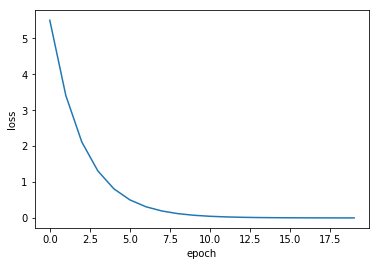

In [10]:
# PLOT LOSS

plt.plot(model[1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

The loss is decreasing with each epoch. Great, gradient descent is working as intended!

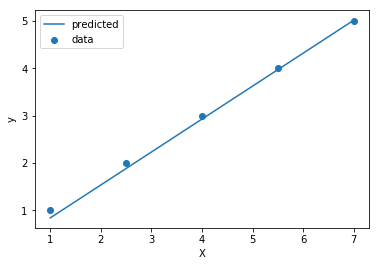

In [11]:
# PLOT DATA WITH REGRESSION LINE

plt.scatter(fake_data[:,1], fake_y, label="data")
plt.plot(fake_data[:,1], model[2], label="predicted")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## PART III - REAL WORLD DATA

Let us now test the implementation on a real-world dataset.

### The dataset.

This is the House Prices dataset from Kaggle. Download at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [12]:
# LOAD TRAINING DATA

df = pd.read_csv('data/train.csv')

In [13]:
print(df.shape)
df.head()

# 1stFlrSF - 1st floor square footage
# 2ndFlrSF - 2nd floor square footage
# SalePrice - is what we will be predicting

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
# OUTPUT VARIABLE

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
df['CombinedSF'] = df['1stFlrSF'] + df['2ndFlrSF'] # Combine sq footage for 1st + 2nd floor

In [16]:
df['CombinedSF'].describe()

count    1460.000000
mean     1509.619178
std       521.163523
min       334.000000
25%      1123.750000
50%      1458.000000
75%      1775.250000
max      5642.000000
Name: CombinedSF, dtype: float64

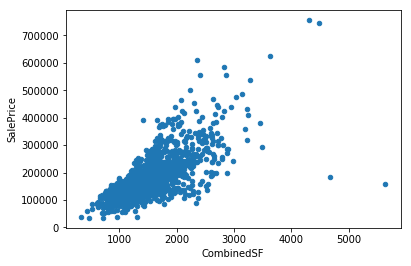

In [17]:
ax = df.plot.scatter(y='SalePrice', x='CombinedSF')
ax

We'll try to predict the sale price of a house given its combined 1st and 2nd floor square footage. 

### Prep the data.

To prepare the data we'll add the constant term $x_0=1$, scale the predictor variable to help gradient descent converge, and split the data into a training set and a testing set.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [19]:
# TRAIN TEST SPLIT

X = pd.DataFrame(np.ones(len(df))) # add the constant
X[1] = df['CombinedSF']            # add predictor variable
X[1] = preprocessing.scale(X[[1]]) # feature scaling 
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3)

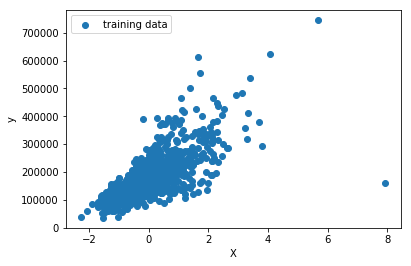

In [20]:
plt.scatter(X_train[:,1], y_train, label="training data")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Train the model.

In [21]:
# SPECIFY PARAMETERS
eta = 0.1
epochs = 50

# TRAIN THE MODEL
model_train = linear_regression(X_train, y_train, eta, epochs)
print("Weights: ", model_train[0])
print("Loss: ", model_train[1][-1]) # print only the most recent Mean squared error

Weights:  [180825.9018246   57084.96377539]
Loss:  1480582715.574328


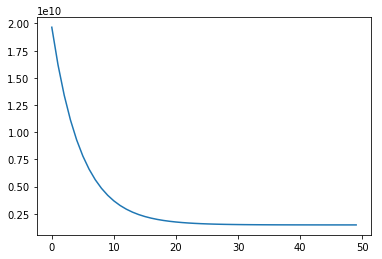

In [22]:
# PLOT LOSS

plt.plot(model_train[1])
plt.show()

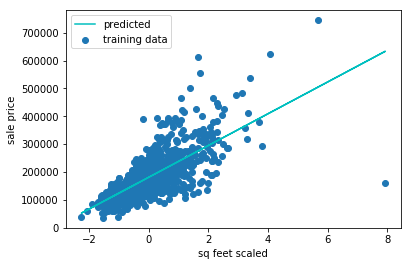

In [23]:
# PLOT DATA WITH REGRESSION LINE

plt.scatter(X_train[:,1], y_train, label="training data")
plt.plot(X_train[:,1], model_train[2], 'c', label="predicted")
plt.xlabel('sq feet scaled')
plt.ylabel('sale price')
plt.legend()
plt.show()

### Test set.

In [24]:
# DEFINE THE MODEL PREDICT FUNCTION

def lin_reg_predict(data, trained_weights):
    y_hat = np.sum(trained_weights * data, axis=1)  # generate predictions
    return y_hat

In [25]:
# PREDICT ON TEST DATA

trained_weights = model_train[0] # extract weights from the trained model
y_pred = lin_reg_predict(X_test, trained_weights) # generate predictions on the test set

In [26]:
# PRINT MEAN SQUARED ERROR

def mse(y_pred, y):
    squared_errors = (y_pred - y) ** 2
    mse = 1/(len(y)) * sum(squared_errors)
    return mse

print("Mean squared error: ", mse(y_pred, y_test))

Mean squared error:  3309899086.8331637


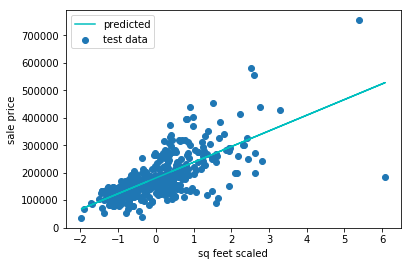

In [27]:
# PLOT TEST DATA WITH REGRESSION LINE

plt.scatter(X_test[:,1], y_test, label="test data")
plt.plot(X_test[:,1], y_pred, 'c', label="predicted")
plt.xlabel('sq feet scaled')
plt.ylabel('sale price')
plt.legend()
plt.show()

### Verify with sk-learn.

Finally we compare our implementation to sk-learn's linear regression.

In [28]:
from sklearn import linear_model

In [29]:
skreg = linear_model.LinearRegression(fit_intercept=False)

skreg.fit(X_train, y_train) # train the model
sk_y_pred = skreg.predict(X_test) # predict on test data

In [30]:
from sklearn.metrics import mean_squared_error
print('Weights: ', skreg.coef_)
print('Mean squared error: ', mean_squared_error(y_test, sk_y_pred))

Weights:  [181759.5653891   57379.73036062]
Mean squared error:  3315041027.9512286


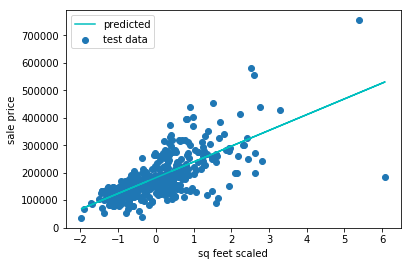

In [31]:
# PLOT DATA WITH REGRESSION LINE

plt.scatter(X_test[:,1], y_test, label="test data")
plt.plot(X_test[:,1], sk_y_pred, 'c', label="predicted")
plt.xlabel('sq feet scaled')
plt.ylabel('sale price')
plt.legend()
plt.show()

In [32]:
# COMPARE LOSS

print("OUR Mean squared error: ", mse(y_pred, y_test)) # our linear regression function
print('SKL Mean squared error: ', mean_squared_error(y_test, sk_y_pred)) # sk-learn

OUR Mean squared error:  3309899086.8331637
SKL Mean squared error:  3315041027.9512286


They're nearly identical, although our algorithm seems to be performing slightly better than sk-learn's.

In [33]:
# COMPARE WEIGHTS

print("OUR Weights: ", model_train[0]) # our linear regression function
print('SKL Weights: ', skreg.coef_) # sk-learn

OUR Weights:  [180825.9018246   57084.96377539]
SKL Weights:  [181759.5653891   57379.73036062]
